# EXPLORATORY DATA ANALYSIS (EDA) ON CRIME AGAINST WOMEN IN INDIA FROM 2001-2014

Crimes against women reported, were at an all time high from the period of 2001-2014, which then resulted in a stagnant phase till late 2018. 

In this extensive Exploratory Data Analysis (EDA) we explore the trends in the overall number of crimes against women in India in the period 2001-2014 and draw up possible solutions and conclusions from the given dataset

# IMPORTING NECESSARY PYTHON LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# LOADING THE DATA

In [3]:
df = pd.read_csv('crimes_against_women_2001-2014 imp.csv')

df.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [4]:
df.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,3871.570198,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,2816.369918,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3678.000000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,6347.000000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [5]:
#checking for missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Unnamed: 0,0,0.0
STATE/UT,0,0.0
DISTRICT,0,0.0
Year,0,0.0
Rape,0,0.0
Kidnapping and Abduction,0,0.0
Dowry Deaths,0,0.0
Assault on women with intent to outrage her modesty,0,0.0
Insult to modesty of Women,0,0.0
Cruelty by Husband or his Relatives,0,0.0


From the above analysis, we can say that our given dataset has no given null values, and thus cleaning / filling up of null values need not be done.

NOTE: Dealing with null values (NAN) in datasets, can be approached in 3 different ways:
>     1. Dropping the data points containing the NULL values
>     2. Dropping entire columns containing the NULL values
>     3. Substituting values in place of NULL values

# CLEANING THE DATA

We observe that the UNNAMED column does not contribute any value to the data at hand.
The DISTRICT column also hold no value to us, as we are analysing the data state wise

In [6]:
# dropping the UNNAMED and DISTRICT columns from the dataset
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['DISTRICT'], axis=1, inplace=True)

Now we'll check if there are redundant or repeating attributes/factors, which may lead to wrong and misguided analysis

In [7]:
#checking for unique values in STATE/UT column
print(df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


Here we can infer that there are repeating values for:
1. A & N ISLANDS / A&N ISLANDS
1. D & N HAVELI / D&N HAVELI
1. DELHI / DELHI UT

In [8]:
# getting case consistency for STATE/UT column
def case_consistency(row):
    row = row['STATE/UT'].strip()
    row = row.upper()
    return row

In [9]:
df['STATE/UT'] = df.apply(case_consistency, axis=1)

df['STATE/UT'].replace('A&N ISLANDS', 'A & N ISLANDS', inplace=True)
df['STATE/UT'].replace('D&N HAVELI', 'D & N HAVELI', inplace=True)
df['STATE/UT'].replace('DELHI UT', 'DELHI', inplace=True)

df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

Now. we'll check for NULL values in our data, which if left unattended, will affect the analysis negatively

In [10]:
# checking for NULL values
df.isnull().sum()

STATE/UT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

Thankfully, our dataset is devoid of NULL values. Thus we can proceed safely

# YEAR-WISE CRIME ANALYSIS

We'll start by defining a function that returns the total no of crimes in a particular year within a particular year as induvidual values

In [11]:
def helper1(all_cases):
    for i in list(df.columns)[2:]:
        all_cases[i] = df.groupby(['Year'])[i].sum()
    
    return all_cases

In [12]:
all_cases = pd.DataFrame()
all_cases = helper1(all_cases)
all_cases

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228
2002,32746,29012,13644,67886,20310,98474,152
2003,31694,26592,12416,65878,24650,101406,92
2004,36466,31156,14052,69134,20002,116242,178
2005,36718,31500,13574,68350,19968,116638,298
2006,38696,34828,15236,73234,19932,126256,134
2007,41474,40832,16186,77468,21900,151860,122
2008,42934,45878,16344,80826,24428,162688,134
2009,42794,51482,16766,77422,22018,179092,96


Now let's look at the total no of crimes against women, each year from 2001-2014

In [13]:
pd.DataFrame(all_cases.sum(axis=1), columns=["Total no of crimes"])

,Total no of crimes
Year,
2001,261450
2002,262224
2003,262728
2004,287230
2005,287046
2006,308316
2007,349842
2008,373232
2009,389670


**NOTE 1:** There is a sharp increase in the total no of crimes during 2012-2013 **(+126,706)**

This crime rate increase during this period can be better visualised using a bar graph

In [14]:
fig = px.bar(pd.DataFrame(all_cases.sum(axis=1),columns=['Total no of crimes']),
             x = pd.DataFrame(all_cases.sum(axis=1)).index,
             y = 'Total no of crimes',
             title = 'Total number of cases in each year from 2001-2014',
             color_discrete_sequence=['crimson']
            )
    
fig.show()

**NOTE 2:** We can note that there is an **142.77%** increase in crime rate within 14 years.

**Deduction:** We can thus say that at the current growth rate, no of crimes in India against women will have reached an astounding **906,193** in numbers by 2028

*HIGHEST Vs LOWEST REPORTED CRIME BY 2014*

In [15]:
pd.DataFrame(all_cases.sum(axis=0), columns=['Count']).sort_values(by='Count', ascending=False)

,Count
Cruelty by Husband or his Relatives,2233888
Assault on women with intent to outrage her modesty,1212258
Kidnapping and Abduction,746198
Rape,619158
Insult to modesty of Women,292756
Dowry Deaths,215480
Importation of Girls,1872


This data can be better represented using a pi chart

In [16]:
fig = px.pie(pd.DataFrame(all_cases.sum(axis=0),columns=['Count']), 
             values='Count', 
             names=pd.DataFrame(all_cases.sum(axis=0)).index, 
             title='Percentage of Each Crime during 2001 - 2014'
            )

fig.show()

**NOTE 3:** Domestic Violence contributes **42%** to total crimes against women, being the most reported one while Importation of Girls is the least reported one with just **0.0352%**

**NOTE 4:** There are atleast **twice** as many cases of domestic violence, as there are cases of assualt - that being the second most reported one (**22.8%**)

**Variation of different crimes throughout the years 2001-2014**

In [17]:
fig = px.bar(all_cases, x=all_cases.index, y='Rape', title='Year wise rape case count', color_discrete_sequence=['black'])

fig.show()

**NOTE 4:** There has been a **128.5%** increase in rape cases from 2001 to 2014.

**NOTE 5:** We can see a huge jump in cases during the year 2012-2013 with a jump of **27.25%**

In [18]:

fig = px.bar(all_cases, x=all_cases.index, y='Kidnapping and Abduction', title='Year wise kidnapping case count', color_discrete_sequence=['green'])

fig.show()

**NOTE 6:** We can see an **exponential** increase in no of kidnapping cases reported in the given 14 years with an increase of **291.34%**

In [19]:
fig = px.bar(all_cases, x=all_cases.index, y='Dowry Deaths', title='Year wise dowry deaths case count', color_discrete_sequence=['indigo'])

fig.show()

**NOTE 7:** We can see a consistent no of cases reported as Dowry deaths without a large margin of difference

In [20]:
fig = px.bar(all_cases, x=all_cases.index, y='Assault on women with intent to outrage her modesty', title='Year wise assault case count', color_discrete_sequence=['brown'])

fig.show()

**NOTE 8:** Until 2012, there has been consistent number of assault cases reported, with the biggest jump in the year 2012-2013 with an increase of **56%**

In [21]:
fig = px.bar(all_cases, x=all_cases.index, y='Insult to modesty of Women', title='Year wise insult case count', color_discrete_sequence=['gray'])

fig.show()

**NOTE 9:** There have been constant **fluctuations** in the number of insult to modesty cases reported throughout 2001-2014

In [22]:
fig = px.bar(all_cases, x=all_cases.index, y='Cruelty by Husband or his Relatives', title='Year wise domestic violence case count', color_discrete_sequence=['maroon'])

fig.show()

**NOTE 10:** We can note the **linear** increase in the no of domestic violence cases reported with an increase of **149.9%**

In [23]:
fig = px.bar(all_cases, x=all_cases.index, y='Importation of Girls', title='Year wise importation case count', color_discrete_sequence=['pink'])

fig.show()

**NOTE 11:** We can note there has been a **decreasing** trend in the number of importation cases reported, with spikes detected during **2005** and **2011**

# STATE / UT WISE CRIME ANALYSIS


Creating a data frame that houses the data state/ut wise

In [24]:
def helper2(state_data):
    for i in list(df.columns)[2:]:
        state_data[i] = df.groupby(['STATE/UT'])[i].sum()
        
    return state_data

In [25]:
state_data = pd.DataFrame()
state_data = helper2(state_data)
state_data

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,
A & N ISLANDS,336,212,20,600,112,288,0
ANDHRA PRADESH,32150,34504,13844,126952,86964,280906,34
ARUNACHAL PRADESH,1316,1470,6,1996,48,476,0
ASSAM,40190,62074,3268,38256,254,115300,22
BIHAR,30758,57086,32206,16958,694,69770,904
CHANDIGARH,770,1682,90,1088,342,2080,0
CHHATTISGARH,29308,11808,2758,47096,3968,23436,12
D & N HAVELI,132,224,2,106,12,90,0
DAMAN & DIU,60,44,6,40,4,76,0


In [26]:
# adding a column to get the state wise total number of cases
state = pd.DataFrame(state_data.sum(axis=1), columns=['Total Cases'])
state

,Total Cases
STATE/UT,
A & N ISLANDS,1568
ANDHRA PRADESH,575354
ARUNACHAL PRADESH,5312
ASSAM,259364
BIHAR,208376
CHANDIGARH,6052
CHHATTISGARH,118386
D & N HAVELI,566
DAMAN & DIU,230


**Let's bring in the top 10 states/UTs with the highest cases reported against women**

In [27]:
pd.DataFrame(state_data.sum(axis=1), columns=['Total Cases']).sort_values(by='Total Cases', ascending=False).head(10)

,Total Cases
STATE/UT,
UTTAR PRADESH,582398
ANDHRA PRADESH,575354
WEST BENGAL,537976
RAJASTHAN,470186
MADHYA PRADESH,467086
MAHARASHTRA,429584
ASSAM,259364
KERALA,225176
GUJARAT,220306


**Let's bring in the 10 states/UTs with th least reported cases of crimes against women**

In [28]:
pd.DataFrame(state_data.sum(axis=1), columns=['Total Cases']).sort_values(by='Total Cases', ascending=True).head(10)

,Total Cases
STATE/UT,
LAKSHADWEEP,54
DAMAN & DIU,230
D & N HAVELI,566
NAGALAND,1072
SIKKIM,1482
A & N ISLANDS,1568
PUDUCHERRY,2718
GOA,4124
MIZORAM,4306


**NOTE 12:** We note that the state with the highest number of crimes against women reported is **Uttar Pradesh** while **Lakshadweep** being the safest.

This data can be more easily represented using a pie chart

In [29]:
fig = px.pie(state, values='Total Cases', names=state.index, title='Total crime State/UT wise distribution')
fig.show()

**Let's bring in the most unsafe state/ut for a specific crime from 2001-2014**

In [30]:
pd.DataFrame(state_data.idxmax(), columns=['STATE/UT'])

,STATE/UT
Rape,MADHYA PRADESH
Kidnapping and Abduction,UTTAR PRADESH
Dowry Deaths,UTTAR PRADESH
Assault on women with intent to outrage her modesty,MADHYA PRADESH
Insult to modesty of Women,ANDHRA PRADESH
Cruelty by Husband or his Relatives,WEST BENGAL
Importation of Girls,BIHAR


**NOTE 13:** We can see that both **Uttar Pradesh** and **Madhya Pradesh** are the most unsafe for 2 types of crimes each

# SPECIFIC STATE/UT WISE CRIME ANALYSIS

Let's write up a function that takes in the name of a state and performs a extensive crime analysis on the state's data

In [31]:
def state_analysis(name):
    try:
        fig = px.pie(state_data, values=state_data.loc[name], names=state_data.iloc[0,:].index, title='Crime Distribution for the STATE/UT of {}'.format(name))
        fig.show()
    except KeyError:
        print('You have entered an invalid State/UT name!')

In [32]:
# uncomment this to enter the state/UT of your choice
# state_name = input('Enter a state/ut to perform an extensive crime against women analysis: ').upper()
state_name = "MAHARASHTRA"
state_analysis(state_name)

# CRIME RATE COMPARISSION BETWEEN 2001 Vs 2014

Text(0.5, 1.0, '2001 VS 2014 CRIME RATE COMPARASION')

<Figure size 1000x1000 with 0 Axes>

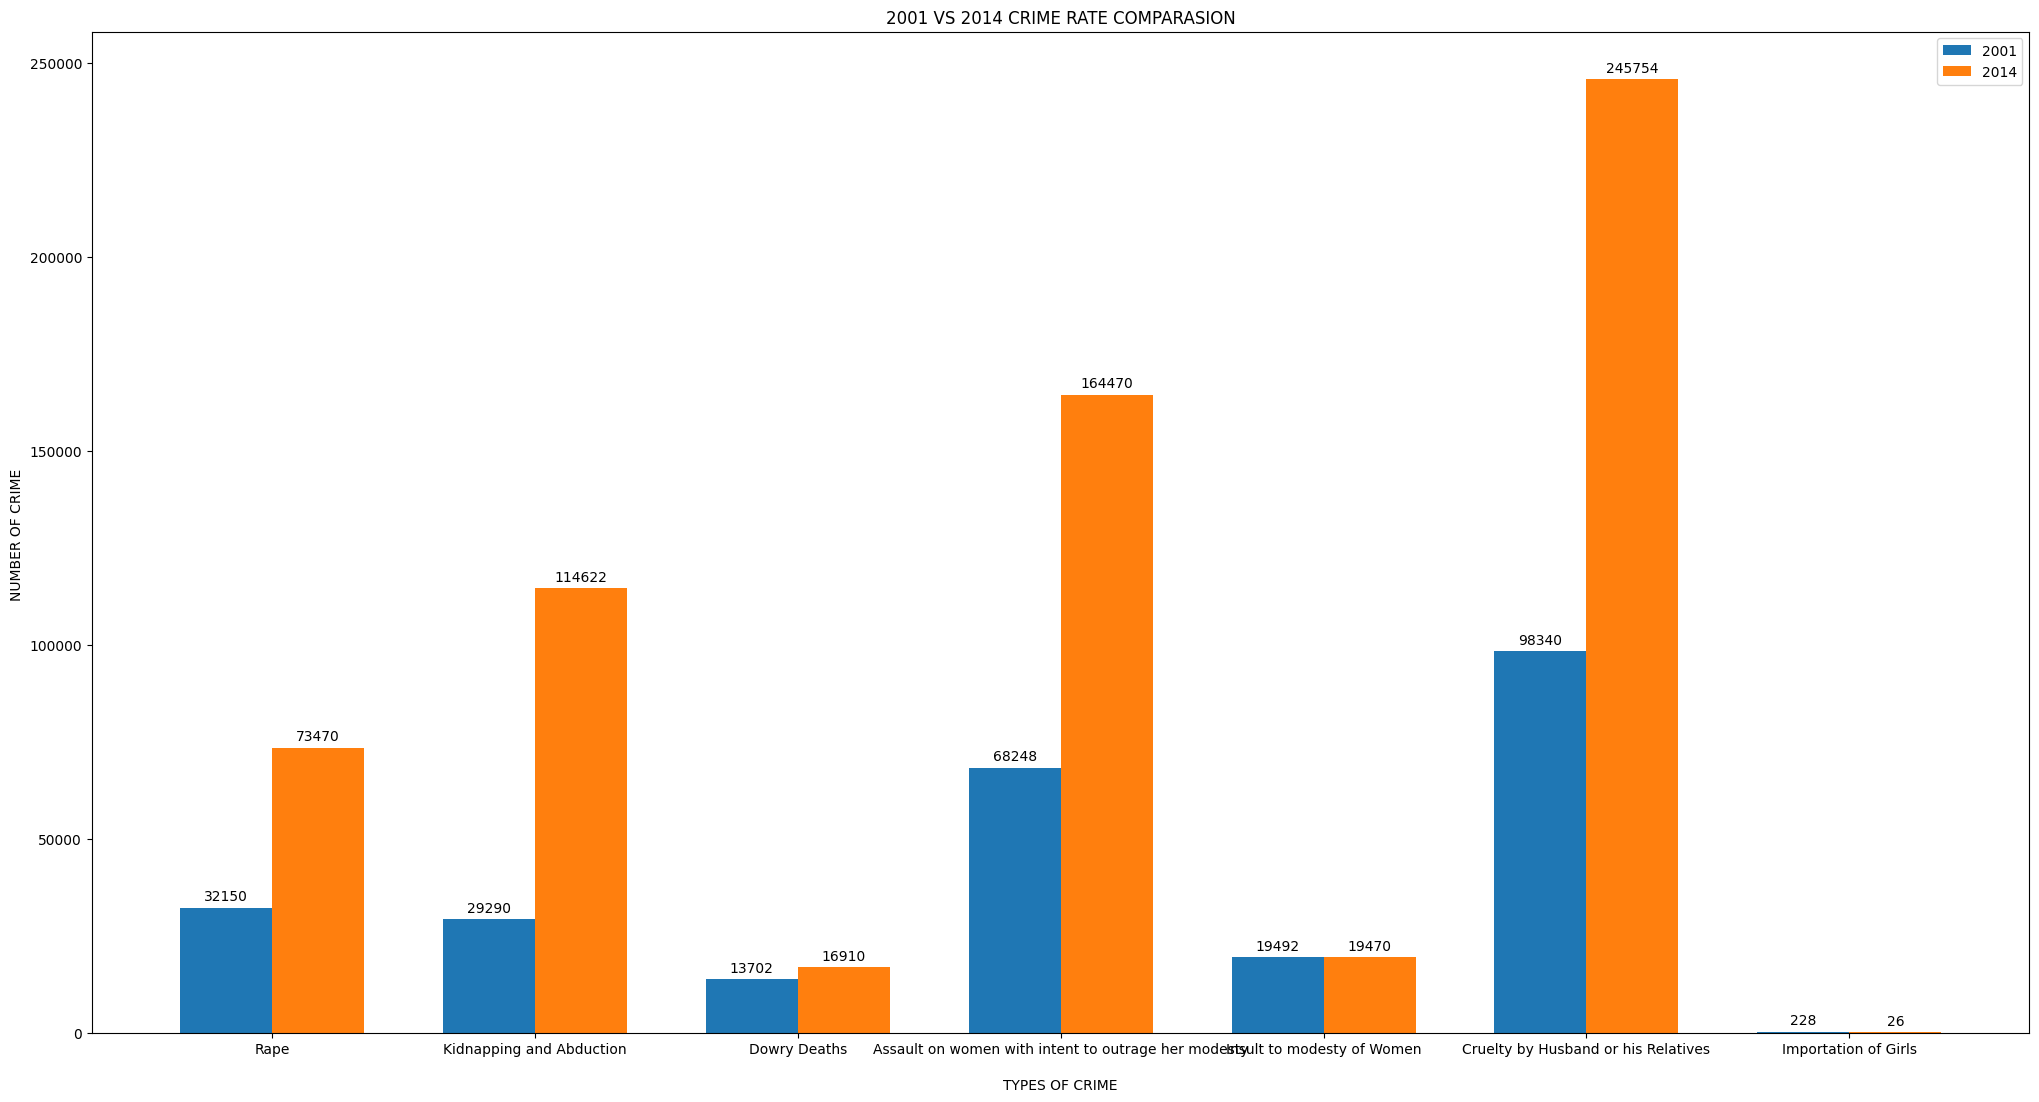

In [33]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,10)
a=np.arange(len(all_cases.T.index))
width=0.35
fig, ax = plt.subplots()
rects1 = ax.bar(a - width/2, all_cases.T[2001], width, label='2001')
rects2 = ax.bar(a + width/2, all_cases.T[2014], width, label='2014')
ax.set_xticks(a)
ax.set_xticklabels(all_cases.T.index)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(25,13)
plt.xlabel('\nTYPES OF CRIME')
plt.ylabel('NUMBER OF CRIME ')
plt.title('2001 VS 2014 CRIME RATE COMPARASION')

**NOTE 14:** You can note that there is a major jump in the crime rate from the year 2001 to 2014 except in the case **Dowry Deaths** (remains constant, with a little increase), **Insult to modesty** (where there is a very subtle decrease in crimes) and **Importation of Girls** (where the crime rate has actually dropped)

**Change in Crime Rate in each State/UT from 2001-2014**

In [34]:
data_2001 = pd.DataFrame()

for i in df.columns[2:]:
    data_2001[i] = df[df.Year==2001].groupby(['STATE/UT'])[i].sum()//2

# data_2001.head()
data_2001['Total Cases in 2001'] = data_2001.sum(axis=1)

data_2014 = pd.DataFrame()

for i in df.columns[2:]:
    data_2014[i] = df[df.Year==2014].groupby(['STATE/UT'])[i].sum()//2
    
# data_2014.head()
data_2014['Total Cases in 2014'] = data_2014.sum(axis=1)

In [35]:
comparission_data = pd.DataFrame()

comparission_data['STATE/UT'] = data_2001.index
comparission_data.set_index('STATE/UT', inplace=True)

comparission_data['Total Cases in 2001'] = data_2001['Total Cases in 2001']
comparission_data['Total Cases in 2014'] = data_2014['Total Cases in 2014']

comparission_data['Increase in total Cases'] = comparission_data['Total Cases in 2014'] - comparission_data['Total Cases in 2001']

comparission_data

,Total Cases in 2001,Total Cases in 2014,Increase in total Cases
STATE/UT,,,
A & N ISLANDS,34,112,78
ANDHRA PRADESH,13669,15455,1786
ARUNACHAL PRADESH,180,341,161
ASSAM,4048,18790,14742
BIHAR,4489,12553,8064
CHANDIGARH,146,424,278
CHHATTISGARH,3964,6122,2158
D & N HAVELI,19,21,2
DAMAN & DIU,7,7,0


**Let's bring in the top 5 states/UTs where the crime rate has increased the most from 2001-2014**

In [36]:
pd.DataFrame(comparission_data, columns=['Increase in total Cases']).sort_values(by='Increase in total Cases',ascending=False).head(5)

,Increase in total Cases
STATE/UT,
WEST BENGAL,29905
RAJASTHAN,18453
UTTAR PRADESH,15809
ASSAM,14742
MADHYA PRADESH,13482


**NOTE 15:** We can note that **West Bengal** has the highest jump in total cases reported with a staggering **30000 cases**

**Let's bring in the top 5 states/UTs with the least increase in crime rate from 2001-2014**

In [37]:
pd.DataFrame(comparission_data, columns=['Increase in total Cases']).sort_values(by='Increase in total Cases', ascending=True).head(5)

,Increase in total Cases
STATE/UT,
PUDUCHERRY,-16
DAMAN & DIU,0
D & N HAVELI,2
LAKSHADWEEP,4
NAGALAND,34


**NOTE 16:** We can see that **Puducherry** has an overall drop in the toal number of cases reported, while **Daman & Diu** has a consistent overall crime rate throughout the years